![sutd](img/sutd.png)
## <center>50.040 Natural Language Processing, Summer 2019<center>
<center>**Mini Project**

<center>**Due 17 June 2019, 5pm** <center>

**Write your student ID and name**

ID: 1002088

Name: Chang Jun Qing

Students with whom you have discussed (if any): (For optional Part) Koh Jing Yu

## Introduction

Language models are very useful for a wide range of applications, e.g., speech recognition and machine translation. Consider a sentence consisting of words $x_1, x_2, …, x_m$, where $m$ is the length of the sentence, the goal of language modeling is to model the probability of the sentence, where $m \geq 1$, $x_i \in V $ and $V$ is the vocabulary of the corpus:
$$p(x_1, x_2, …, x_m)$$
In this project, we are going to explore both statistical language model and neural language model on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) datasets.

## Statistical  Language Model

A simple way is to view words as independent random variables (i.e., zero-th order Markovian assumption). The joint probability can be written as:
$$p(x_1, x_2, …, x_m)=\prod_{i=1}^m p(x_i)$$
However, this model ignores the word order information, to account for which, under the first-order Markovian assumption, the joint probability can be written as:
$$p(x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-1})$$
Under the second-order Markovian assumption, the joint probability can be written as:
$$p(x_{-1}, x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-2}, x_{i-1})$$
Similar to what we did in HMM, we will assume that $x_{-1}=START, x_0=START, x_m = STOP$ in this definition, where $START, STOP$ are special symbols referring to the start and the end of a sentence.







### Parameter estimation

Let's use $count(u)$ to denote the number of times the unigram $u$ appears in the corpus, use $count(v, u)$ to denote the number of times the bigram $v, u$ appears in the corpus, and $count(w, v, u)$ the times the trigram $w, v, u$ appears in the corpus, $u \in V \cup STOP$ and $w, v \in V \cup START$.

And the parameters of the unigram, bigram and trigram models can be obtained using maximum likelihood estimation (MLE).

- In the unigram model, the parameters can be estimated as: $$p(u) = \frac {count(u)}{c}$$, where $c$ is the total number of words in the corpus.
- In the bigram model, the parameters can be estimated as:
$$p(u \mid v) = \frac{count(v, u)}{count(v)}$$
- In the trigram model, the parameters can be estimated as:
$$p(u \mid w, v) = \frac{count(w, v, u)}{count(w, v)}$$




### Smoothing the parameters
Note, it is likely that many parameters of bigram and trigram models will be 0 because the relevant bigrams and trigrams involved do not appear in the corpus. If you don't have a way to handle these 0 probabilities, all the sentences that include such bigrams or trigrams will have probabilities of 0.

We'll use a Add-k Smoothing method to fix this problem, the smoothed parameter can be estimated as:
$$p_{add-k}(u)= \frac{count(u)+k}{c+k|V^*|}$$
$$p_{add-k}(u \mid v)= \frac{count(v, u)+k}{count(v)+k|V^*|}$$
$$p_{add-k}(u \mid w, v)= \frac{count(w, v, u)+k}{count(w, v)+k|V^*|}$$

where $k \in (0, 1)$ is the parameter of this approach, and $|V^*|$ is the size of the vocabulary $V^*$,here $V^*= V \cup STOP$. One way to choose the value of $k$ is by
optimizing the perplexity of the development set, namely to choose the value that minimizes the perplexity.



### Perplexity

Given a test set $D^{\prime}$ consisting of sentences $X^{(1)}, X^{(2)}, …, X^{(|D^{\prime}|)}$, each sentence $X^{(j)}$ consists of words $x_1^{(j)}, x_2^{(j)},…,x_{n_j}^{(j)}$, we can measure the probability of each sentence $s_i$, and the quality of the language model would be the probability it assigns to the entire set of test sentences, namely:
$$\prod_j^{D^{\prime}}p(X^{(j)})$$
Let's define average log2 probability as:
$$l=\frac{1}{c^{\prime}}\sum_{j=1}^{|D^{\prime}|}log_2p(X^{(j)})$$
$c^{\prime}$ is the total number of words in the test set, $D^{\prime}$ is the number of sentences. And the perplexity is defined as:
$$perplexity=2^{-l}$$

The lower the perplexity, the better the language model.

## Neural Language Model

Using the chain rule, the probability of a sentence consisting of words $x_1, x_2, ..., x_n$ can be represented as:

$$p(x_1, x_2, ..., x_n) = \prod_{i=1}^n p(x_t \mid x_{t-1}, ..., x_1)$$

Assume that we can use a hidden vector $h_t\in R^d$ of a recurrent neural network (RNN) to record the history information of words:
$$h_t = RNN(x_t, h_{t-1})$$

The conditional probability of word $x_{t+1}$ can be parameterized as:
$$p(x_{t+1} \mid x_{t}, x_{t-1}, ..., x_1) \propto exp(f(w_{x_{t+1}}h_{t}))$$

$d$ is the dimension size of the hidden layer, $|V|$ is the size of the vocabulary. $f$ is a fully-connected layer, where $w \in R^{|V| \times d}$ are the parameters, $w_{x_{t+1}}$ is the parameter in the row that corresponds to the index of $x_{t+1}$ in the vocabulary, the bias is omitted. 



#### Task 5 (12 points)
We will create a LSTM language model, and train it on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) dataset. The data generators(train_iter, valid_iter, test_iter) and the LSTM model(in the file "lstm\_model.py") have been provided. The word embeddings together with the parameters in the LSTM model will be learned from scratch.
Our tasks:
- Complete the training and evaluating code, tune hyperparameters on the validation data, then compute the perplexity of the test data. The test perplexity should be below 150. (5 points)
- Visualize word embeddings trained by our language model as in Homework 1, try to find patterns, i.e., are similar words clustering? (2 points)
- Implement a 2-layer bidirectional LSTM language model as shown in Fig 1, train the language model from both directions, compute the perplexity of the test data for each direction. Note, the forward and backward LSTMs do not share parameters, and the outputs from the previous layer can be only passed to the next layer in the same direction. (5 points)
![bilstm](img/bilstm.png)

<center>Fig 1: 2-layer Bidirectionl LSTM Language Model Architecture

The START and STOP symbols have been added to the sentences in the generators, and the second dimension of the outputs of generators is the index of the batch.

[Pytorch](https://pytorch.org/tutorials/) is required in this part. Do not make any changes to the provided code unless you are requested to do so. 

#### Task 6 (Optional, 6 points)
We can train our 2-layer bidirectional LSTM language model on a relatively large dataset [wikitext-103](https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-v1.zip) and explore some interesting characteristics of the model. Our tasks:
- Generate a piece of text ending with the STOP symbol but no more than 50 words given the START symbol, check whether it is fluent or not based on your tuition.
- Feed each sentence of the movie reviews in homework 1 to our language model, concatenate the outputs of forward and backward LSTMs as the contextualized embedding for each word in the sentence.
- Train the provided RNN Classifier in homework 1 based on the contextualized word embeddings of the train set, tune parameters on the development set and evaluate the performances on the test set.
- Consider “play”, a highly polysemous word, find 20 sentences including "play", half of them refer to the verb, and half of them refer to the noun. Visualize the contextualized embeddings of "play" in the sentences, check whether the embeddings can capture the contextual information or not.

References: 

- [EXPLORING THE LIMITS OF LANGUAGE MODELING](https://arxiv.org/pdf/1602.02410.pdf)
- [IMPROVING NEURAL LANGUAGE MODELS WITH A CONTINUOUS CACHE](https://arxiv.org/pdf/1612.04426.pdf)
- [LEARNING LONGER MEMORY IN RECURRENT NEURAL NETWORKS](https://arxiv.org/pdf/1412.7753.pdf)

In [1]:
##Write your code here
#load packages
import torchtext
import torch
from torchtext.datasets import WikiText103
from torch import nn, optim
from torchtext import data
from nltk import word_tokenize
from lstm_model import LSTMModel
torch.manual_seed(222)
import math
import sys


In [3]:
def tokenizer(text):
    '''Tokenize a string to words'''
    return word_tokenize(text)

#Load and split data into three parts
TEXT = data.Field(lower=True, tokenize=tokenizer, init_token='<START>')

train, valid, test = WikiText103.splits(TEXT) 

#Build a vocabulary from the train dataset
TEXT.build_vocab(train) 
# Limiting the max size as there are many words with occurance 1 only.
print('Vocabulary size:', len(TEXT.vocab))

#Create data generators
BATCH_SIZE = 16
BPTT_LEN = 32#the length of a text feeding to the RNN layer
train_iter, valid_iter, test_iter = data.BPTTIterator.splits(
    (train, valid, test),
    batch_size=BATCH_SIZE,
    bptt_len=BPTT_LEN,
    repeat=False)

emb_size = 128
hidden_size = 128
dropout = 0.2
num_layer = 2
learning_rate = 0.01
epochs = 5

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

Vocabulary size: 229329


Counts of words with 0-100 counts [0, 113, 37, 36975, 23547, 16063, 12312, 9737, 7911, 6629, 5646, 4895, 4353, 3831, 3445, 3131, 2935, 2475, 2484, 2222, 1969, 1865, 1737, 1568, 1529, 1435, 1324, 1294, 1235, 1132, 1131, 1083, 1044, 949, 968, 877, 885, 840, 803, 733, 734, 688, 695, 640, 649, 629, 615, 617, 556, 586, 535, 508, 480, 527, 486, 499, 457, 420, 434, 414, 397, 409, 398, 386, 423, 417, 343, 333, 296, 342, 324, 331, 320, 283, 314, 322, 302, 231, 300, 259, 306, 251, 272, 259, 263, 232, 272, 244, 247, 245, 222, 236, 228, 223, 219, 233, 218, 178, 194, 188, 227]


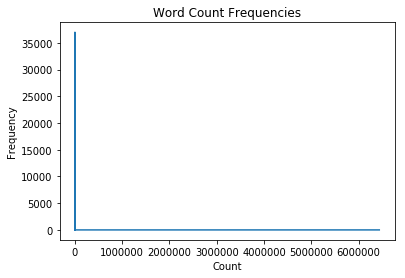

In [12]:
import matplotlib.pyplot as plt
counts = [0] * (TEXT.vocab.freqs.most_common(1)[0][1]+1)
for key in TEXT.vocab.freqs:
    counts[TEXT.vocab.freqs[key]] += 1
print('Counts of words with 0-100 counts', counts[:101])
plt.plot(range(len(counts)), counts)
plt.title('Word Count Frequencies')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

## We can see that a bulk of the words have very low count, so we will reduce the vocab size to exclude these words

In [13]:
def tokenizer(text):
    '''Tokenize a string to words'''
    return word_tokenize(text)

#Load and split data into three parts
TEXT = data.Field(lower=True, tokenize=tokenizer, init_token='<START>')

train, valid, test = WikiText103.splits(TEXT) 

#Build a vocabulary from the train dataset
TEXT.build_vocab(train, max_size=50000) 
# Limiting the max size as there are many words with occurance 1 only.
print('Vocabulary size:', len(TEXT.vocab))

#Create data generators
BATCH_SIZE = 16
BPTT_LEN = 32#the length of a text feeding to the RNN layer
train_iter, valid_iter, test_iter = data.BPTTIterator.splits(
    (train, valid, test),
    batch_size=BATCH_SIZE,
    bptt_len=BPTT_LEN,
    repeat=False)

emb_size = 128
hidden_size = 128
dropout = 0.2
num_layer = 2
learning_rate = 0.01
epochs = 5

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

Vocabulary size: 50003


## Training of the model was done on a cluster, thus the outputs are not shown here. Refer to log3.txt for the outputs

In [19]:
def train(train_iter, model, optimizer, criterion, BATCH_SIZE, device):
    model.train()
    total_loss = 0   
    for batch in iter(train_iter):
        optimizer.zero_grad()
        data, target = batch.text.to(device), batch.target.to(device)
        hidden = model.init_hidden(BATCH_SIZE)
        output, hidden = model(data, hidden)
        output = torch.transpose(output, 1, 2)
        loss = criterion(output, target)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    return total_loss/len(train_iter)

def test(test_iter, model, criterion, BATCH_SIZE, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in iter(test_iter):
            data, target = batch.text.to(device), batch.target.to(device)
            hidden = model.init_hidden(BATCH_SIZE)
            output, hidden = model(data, hidden)
            output = torch.transpose(output, 1, 2)
            loss = criterion(output, target)
            total_loss += loss.item()
    return total_loss/len(test_iter), math.exp(total_loss/len(test_iter))

def backward_train(train_iter, model, optimizer, criterion, BATCH_SIZE, device):
    model.train()
    total_loss = 0   
    for batch in iter(train_iter):
        optimizer.zero_grad()
        data, target = torch.flip(batch.text, (0,1)).to(device),torch.flip(batch.target, (0,1)).to(device)
        hidden = model.init_hidden(BATCH_SIZE)
        output, hidden = model(target, hidden)
        output = torch.transpose(output, 1, 2)
        loss = criterion(output, data)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    return total_loss/len(train_iter)

def backward_test(test_iter, model, criterion, BATCH_SIZE, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in iter(test_iter):
            data, target = torch.flip(batch.text, (0,1)).to(device),torch.flip(batch.target, (0,1)).to(device)
            hidden = model.init_hidden(BATCH_SIZE)
            output, hidden = model(target, hidden)
            output = torch.transpose(output, 1, 2)
            loss = criterion(output, data)
            total_loss += loss.item()
    return total_loss/len(test_iter), math.exp(total_loss/len(test_iter))

In [1]:
forward_model = LSTMModel(len(TEXT.vocab), emb_size, hidden_size, num_layer, dropout)
forward_model.to(device)
forward_optimizer = torch.optim.Adam(forward_model.parameters(), lr=learning_rate)
forward_criterion = torch.nn.NLLLoss()
forward_early_stop = 0
forward_early_loss = sys.maxsize

for epoch in range(1, epochs+1):
    forward_train_loss = train(train_iter, forward_model, forward_optimizer, forward_criterion, BATCH_SIZE, device)
    forward_val_loss, forward_perplexity = test(valid_iter, forward_model, forward_criterion, BATCH_SIZE, device)
    print('Epoch {}\nTrain Loss Forward: {}\nValidation Loss Forward: {}\nPerplexity Forward: {}'.format(epoch, forward_train_loss, forward_val_loss, forward_perplexity), flush=True)
  
    if forward_val_loss < forward_early_loss:
        forward_early_loss = forward_val_loss
        forward_early_stop = 0
        forward_wts = forward_model.state_dict()
        torch.save(forward_wts,'forward103_model.pt')
        
    else:
        forward_early_stop += 1
        if forward_early_stop == 2:
            break

In [ ]:
backward_model = LSTMModel(len(TEXT.vocab), emb_size, hidden_size, num_layer, dropout)
backward_model.to(device)
backward_optimizer = torch.optim.Adam(backward_model.parameters(), lr=learning_rate)
backward_criterion = torch.nn.NLLLoss()
backward_early_stop = 0
backward_early_loss = sys.maxsize

for epoch in range(1, epochs+1):
    backward_train_loss = backward_train(train_iter, backward_model, backward_optimizer, backward_criterion, BATCH_SIZE, device)
    backward_val_loss, backward_perplexity = backward_test(valid_iter, backward_model, backward_criterion, BATCH_SIZE, device)
    print('Epoch {}\nTrain Loss Backward: {}\nValidation Loss Backward: {}\nPerplexity Backward: {}'.format(epoch, backward_train_loss, backward_val_loss, backward_perplexity), flush=True)
            
    if backward_val_loss < backward_early_loss:
        backward_early_loss = backward_val_loss
        backward_early_stop = 0
        backward_wts = backward_model.state_dict()
        torch.save(backward_wts,'backward103_model.pt')
    else:
        backward_early_stop += 1
        if backward_early_stop == 2:
            break


## End of training in cluster, subsequent cells are ran here

In [15]:
forwardmodel = LSTMModel(len(TEXT.vocab), 256, 256, 2, 0.4)
forwardmodel.to(device)
forwardmodel.load_state_dict(torch.load('forward103_model.pt', map_location=device))


In [28]:
from torch.distributions.categorical import Categorical

# Beam search for sentence
best_beam = 0
num_beams = 0
best_sentence = ''
found_beams = False
forwardmodel.eval()
while not found_beams:
    found = False
    num_beams += 1
    while not found:
        beam_prob = 1
        outstr = ''
        outstr += TEXT.vocab.itos[TEXT.vocab.stoi['<START>']]
        out = torch.Tensor([[TEXT.vocab.stoi['<START>']]]).long().to(device)
        hidden = forwardmodel.init_hidden(1)
        
        for i in range(50):
            out, hidden = forwardmodel(out, hidden)
            out = torch.exp(out)
            m = Categorical(out)
            next_out = m.sample()
            idx = next_out[0][0]
            beam_prob *= out[0][0][idx]
            outstr += ' ' + TEXT.vocab.itos[idx]
            if TEXT.vocab.itos[idx] == '<eos>':
                found = True
                print('Found {} sentence'.format(num_beams))
                if beam_prob > best_beam:
                    best_beam = beam_prob
                    best_sentence = outstr
                break
            out = next_out
    if num_beams == 5:
        found_beams = True
        break
        
print(best_sentence)

Found 1 sentence
Found 2 sentence
Found 3 sentence
Found 4 sentence
Found 5 sentence
<START> in the solomon islands in a siege . <eos>


In [29]:
backwardmodel = LSTMModel(len(TEXT.vocab), 256, 256, 2, 0.4)
backwardmodel.to(device)
backwardmodel.load_state_dict(torch.load('backward103_model.pt', map_location=device))
backwardmodel.eval()

LSTMModel(
  (drop): Dropout(p=0.4)
  (encoder): Embedding(50003, 256)
  (rnn): LSTM(256, 256, num_layers=2, dropout=0.4)
  (decoder): Linear(in_features=256, out_features=50003, bias=True)
  (softmax): Softmax()
)

In [30]:
import pandas as pd
import numpy as np
from dynamic_rnn import dynamicRNN

train_data_split = pd.read_csv('data/train_data_processed.csv')
test_data_split = pd.read_csv('data/test_data_processed.csv')
train_data_split.head()

,PhraseId,SentenceId,Phrase,Sentiment,length
0,44878,2177,of a pregnant premise being wasted by a script...,0,24
1,65677,3329,"All comedy is subversive , but this unrelentin...",0,26
2,102694,5410,"dwells on crossing-over mumbo jumbo , manipula...",0,13
3,4154,156,"the kind of lush , all-enveloping movie experi...",1,8
4,147293,8015,"It 's a fine , focused piece of work that reop...",1,20


In [3]:
# From HW1
class RNNClassifier(nn.Module):
    '''
    Transform sentence representations to sentiment label expression
    '''
    def __init__(self, embed_dim, hidden_dim, output_dim=2):
        '''
        Args:
            embed_dim: embedding dimension, integer
            hidden_dim: GRU hidden layer dimension, integer
            output_dim: output dimension(label size), integer
        '''
        super(RNNClassifier, self).__init__()
        self.dynRNN = dynamicRNN(embed_dim, hidden_dim)
        self.linear = torch.nn.Linear(hidden_dim, output_dim)
        self.dropout = torch.nn.Dropout(0.2)
        self.log_softmax = torch.nn.LogSoftmax(dim=1)
     
    def forward(self, text_seq_embs, text_seq_lens):
        '''
        Args:
            text_seq_embs: batch sequences of word embedding, batch_size*sequence_length*embedding_dim
            text_seq_lens: actual lengths of each batch sequence, batch_size
        '''
        ################to be completed##############
        #1. Obtain the final hidden states for each sentences using dynamicRNN
        x = self.dynRNN(text_seq_embs, text_seq_lens)
        #2. Use dropout on the sentence representations
        x = self.dropout(x)
        #3. Feed the sentence vectors to a fully-connected layer
        x = self.linear(x)
        #4. Get and return the log softmax values of the output
        x = self.log_softmax(x)
        return x


In [32]:
from sklearn.model_selection import train_test_split
train_labels = train_data_split.Sentiment.values
test_labels = test_data_split.Sentiment.values
train_data = train_data_split.Phrase.values
test_data = test_data_split.Phrase.values
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)


In [33]:
def seq2emb(tokens, TEXT, forwardmodel, backwardmodel, device, max_pad_length=52):
    
    forwardmodel.eval()
    backwardmodel.eval()
    with torch.no_grad():
        seqvec = [[TEXT.vocab.stoi[word]] for word in tokens]
        seqvec += [np.zeros_like(seqvec[0])] * (max_pad_length-len(seqvec))
        forward_out = torch.Tensor(seqvec).to(device)
        backward_out = torch.flip(forward_out, (0,1))        
        forward_hidden = forwardmodel.init_hidden(1)
        backward_hidden = backwardmodel.init_hidden(1)
        
        forward_emb = forwardmodel.encoder(forward_out.long())
        forward_emb = forwardmodel.drop(forward_emb)
        forward_hidden = forwardmodel.repackage_hidden(forward_hidden)
        forward_out, forward_hidden = forwardmodel.rnn(forward_emb, forward_hidden)
        
        backward_emb = backwardmodel.encoder(backward_out.long())
        backward_emb = backwardmodel.drop(backward_emb)
        backward_hidden = backwardmodel.repackage_hidden(backward_hidden)
        backward_out, backward_hidden = backwardmodel.rnn(backward_emb, backward_hidden)
        
        forward_out = forward_out.squeeze(1)
        backward_out = backward_out.squeeze(1)
        rnn_in = torch.cat((forward_out, backward_out), 1)
    
    return rnn_in

def text2emb(texts, TEXT, forwardmodel, backwardmodel, device):
    text_seqs = [x.split() for x in texts]
    text_lens = torch.LongTensor([len(seq) for seq in text_seqs])
    text_seq_embs = [seq2emb(seq, TEXT, forwardmodel, backwardmodel, device) for seq in text_seqs]
    text_seq_embs = torch.stack(text_seq_embs, dim=0)
    return text_seq_embs, text_lens

In [41]:
batch_size = 8
epochs = 7
max_len = 52
all_costs = []
all_val_loss = []
lstm_emb_size = 256*2

emb_sizes = [64,128,256]
best_model = None
best_loss = sys.maxsize
for emb_size in emb_sizes:
    print('Embedding Size: {}'.format(emb_size))
    torch.manual_seed(1)
    classifier = RNNClassifier(lstm_emb_size, emb_size)
    classifier.to(device)
    optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)
    loss_func = torch.nn.NLLLoss()
    costs = []
    valid_losses = []
    for epoch in range(epochs):
        cost = 0
        classifier.train()
        for i in range(0, len(train_data), batch_size):
            classifier.zero_grad()
            rnn_in_emb, rnn_in_len = text2emb(train_data[i:i+batch_size], TEXT, forwardmodel, backwardmodel, device)
            target = torch.LongTensor(train_labels[i:i+batch_size]).to(device)
            pred_probs = classifier(rnn_in_emb, rnn_in_len)
            loss = loss_func(pred_probs, target)
            loss.backward()
            optimizer.step()
            cost += loss.item()
            if i % 500 == 0:
                if i>0:
                    costs.append(cost/500)
                cost = 0
                print('Training Loss {:.2f}'.format(loss))

        val_loss = 0
        classifier.eval()
        with torch.no_grad():
            for i in range(0, len(valid_data), batch_size):
                classifier.zero_grad()
                rnn_in_emb, rnn_in_len = text2emb(valid_data[i:i+batch_size], TEXT, forwardmodel, backwardmodel, device)
                target = torch.LongTensor(valid_labels[i:i+batch_size]).to(device)
                pred_probs = classifier(rnn_in_emb, rnn_in_len)
                loss = loss_func(pred_probs, target)
                val_loss += loss.item()
        valid_losses.append(val_loss/len(valid_data)*batch_size)
        print('Validation Loss {:.5f}'.format(val_loss/len(valid_data)*batch_size))
        if val_loss < best_loss:
            best_loss = val_loss
            best_model = classifier
    all_costs.append(costs)
    all_val_loss.append(valid_losses)

Embedding Size: 64
Training Loss 0.69
Training Loss 0.67
Training Loss 0.48
Training Loss 0.61
Training Loss 0.61
Training Loss 0.40
Training Loss 0.35
Training Loss 0.42
Training Loss 0.20
Training Loss 0.36
Training Loss 0.71
Training Loss 0.94
Validation Loss 0.50097
Training Loss 0.60
Training Loss 0.35
Training Loss 0.46
Training Loss 0.40
Training Loss 0.48
Training Loss 0.30
Training Loss 0.34
Training Loss 0.28
Training Loss 0.16
Training Loss 0.24
Training Loss 0.75
Training Loss 0.88
Validation Loss 0.46561
Training Loss 0.53
Training Loss 0.32
Training Loss 0.37
Training Loss 0.42
Training Loss 0.39
Training Loss 0.29
Training Loss 0.53
Training Loss 0.26
Training Loss 0.12
Training Loss 0.16
Training Loss 0.70
Training Loss 0.83
Validation Loss 0.45292
Training Loss 0.59
Training Loss 0.30
Training Loss 0.30
Training Loss 0.35
Training Loss 0.40
Training Loss 0.19
Training Loss 0.58
Training Loss 0.17
Training Loss 0.07
Training Loss 0.07
Training Loss 0.77
Training Loss 0.

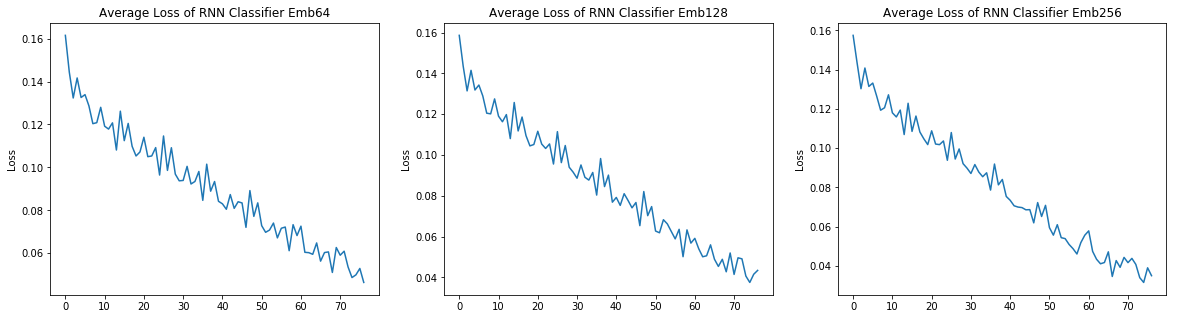

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
plt.title('Average Loss of RNN Classifier Emb64')
plt.ylabel('Loss')
plt.plot(range(len(all_costs[0])), all_costs[0])

plt.subplot(1,3,2)
plt.title('Average Loss of RNN Classifier Emb128')
plt.ylabel('Loss')
plt.plot(range(len(all_costs[1])), all_costs[1])

plt.subplot(1,3,3)
plt.title('Average Loss of RNN Classifier Emb256')
plt.ylabel('Loss')
plt.plot(range(len(all_costs[2])), all_costs[2])

plt.show()

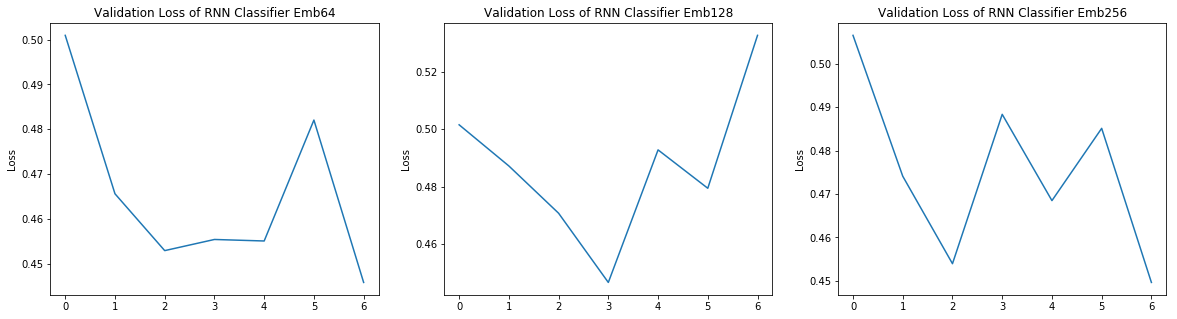

In [43]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
plt.title('Validation Loss of RNN Classifier Emb64')
plt.ylabel('Loss')
plt.plot(range(len(all_val_loss[0])), all_val_loss[0])

plt.subplot(1,3,2)
plt.title('Validation Loss of RNN Classifier Emb128')
plt.ylabel('Loss')
plt.plot(range(len(all_val_loss[1])), all_val_loss[1])

plt.subplot(1,3,3)
plt.title('Validation Loss of RNN Classifier Emb256')
plt.ylabel('Loss')
plt.plot(range(len(all_val_loss[2])), all_val_loss[2])

plt.show()

In [48]:
# Saving model as checkpoint for reusing later on
best_model_wts = best_model.state_dict()
torch.save(best_model_wts,'best_optional_model.pt')
best_model.eval()

RNNClassifier(
  (dynRNN): dynamicRNN(
    (rnn): GRU(512, 64, batch_first=True)
  )
  (linear): Linear(in_features=64, out_features=2, bias=True)
  (dropout): Dropout(p=0.2)
  (log_softmax): LogSoftmax()
)

In [49]:
test_loss = 0
num_correct = 0
with torch.no_grad():
    for i in range(0, len(test_data), batch_size):
        classifier.zero_grad()
        rnn_in_emb, rnn_in_len = text2emb(test_data[i:i+batch_size], TEXT, forwardmodel, backwardmodel, device)
        target = torch.LongTensor(test_labels[i:i+batch_size]).to(device)
        pred_probs = best_model(rnn_in_emb, rnn_in_len)
        pred = torch.exp(pred_probs).argmax(dim=1)
        loss = loss_func(pred_probs, target)
        for j in range(len(target)):
            if pred[j] == target[j]:
                num_correct += 1
        test_loss += loss.item()
print('Test Loss {:.5f}'.format(test_loss/len(test_data)*batch_size))
print('Accuracy: {}/{} ({})'.format(num_correct, len(test_data), num_correct/len(test_data)))

Test Loss 0.42007
Accuracy: 838/1000 (0.838)


## Restarted doing work from here by reloading the models

In [6]:
from dynamic_rnn import dynamicRNN
device = torch.device('cuda')
best_model = RNNClassifier(256*2, 64)
best_model.to(device)
best_model.load_state_dict(torch.load('best_optional_model.pt', map_location=device))

In [9]:
backwardmodel = LSTMModel(50003, 256, 256, 2, 0.4)
backwardmodel.to(device)
backwardmodel.load_state_dict(torch.load('backward103_model.pt', map_location=device))
backwardmodel.eval()

forwardmodel = LSTMModel(50003, 256, 256, 2, 0.4)
forwardmodel.to(device)
forwardmodel.load_state_dict(torch.load('forward103_model.pt', map_location=device))
forwardmodel.eval()

LSTMModel(
  (drop): Dropout(p=0.4)
  (encoder): Embedding(50003, 256)
  (rnn): LSTM(256, 256, num_layers=2, dropout=0.4)
  (decoder): Linear(in_features=256, out_features=50003, bias=True)
  (softmax): Softmax()
)

In [10]:
# Taken from http://www.manythings.org/audio/sentences/353.html and https://sentence.yourdictionary.com/play
play_sentence = ['Play it cool.',
                'I play the piano.',
                'I can play tennis.',
                'I play the violin.',
                'We play on Sunday.',
                'Do you play soccer?',
                'Does she play piano?',
                'He can play a flute.',
                'Let\'s play baseball.',
                'I saw Tom play tennis.',
                'She acted in the play.',
                'The play was based on a true story.',
                'She acted in a play for the first time.',
                'He showed me the manuscript of his new play.',
                'Now play time with my frightened friend will be hurried.',
                'Randy asked about Fred, and Dean related Fred\'s latest exploits with the bargains from the props of the play Boo!',
                'The play seemed so real, we almost forgot where we were, and believed we were watching the genuine scenes as they were acted so long ago.',
                'Thinking that turn and turn about is fair play, she seized the scissors and cut off one of my curls, and would have cut them all off but for my mother\'s timely interference.',
                'After the play Miss Sullivan took me to see him behind the scenes, and I felt of his curious garb and his flowing hair and beard.',
                'I shall never forget the ripple of alternating joy and woe that ran through that beautiful little play, or the wonderful child who acted it.']

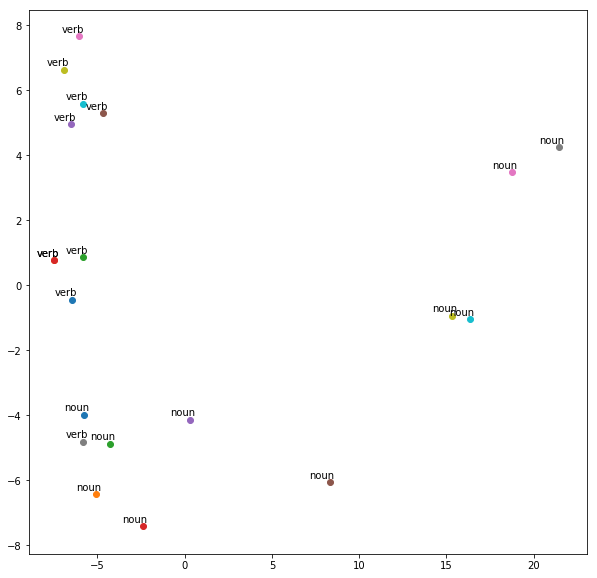

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


#Visualize the transformed word embeddings and annotate them with words.
def plot(embeddings, labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(10,10))  # in inches
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                       ha='right', va='bottom')

all_sentences = []
for sentence in play_sentence:
    with torch.no_grad():
        rnn_in_emb, rnn_in_len = text2emb([sentence], TEXT, forwardmodel, backwardmodel, device)
        all_sentences.append(rnn_in_emb.cpu().detach().numpy()[0])

all_sentences = np.array(all_sentences).reshape((20,-1))

pca=PCA(n_components=2)

two_d_embeddings = pca.fit_transform(all_sentences)
# The first 10 sentences were verbs and the next 10 were nouns
labels = ['verb']*10 + ['noun']*10
                     
plot(two_d_embeddings, labels)

## We can see that the points are somewhat clustered. With some points being not so clear a the bottom left

### Requirements:
- This is an individual report.
- Complete the code using Python.
- List students with whom you have discussed if there are any.
- Follow the honor code strictly.

### Free GPU Resources
We suggest that you run neural language models on machines with GPU(s). Google provides the free online platform [Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb), a research tool for machine learning education and research. It’s a Jupyter notebook environment that requires no setup to use as common packages have been  pre-installed. Google users can have access to a Tesla T4 GPU (approximately 15G memory). Note that when you connect to a GPU-based VM runtime, you are given a maximum of 12 hours at a time on the VM.

It is convenient to upload local Jupyter Notebook files and data to Colab, please refer to the [tutorial](https://colab.research.google.com/notebooks/io.ipynb). 

In addition, Microsoft also provides the online platform [Azure Notebooks](https://notebooks.azure.com/help/introduction) for research of data science and machine learning, there are free trials for new users with credits.